# Exploring Dandiset 001195: Dorsal Raphe Dopamine Projections in Loneliness-like State

> **Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores Dandiset 001195 ([link](https://dandiarchive.org/dandiset/001195/0.250408.1733)), which contains intracellular electrophysiology recordings investigating how dorsal raphe nucleus (DRN) dopamine neurons mediate different aspects of loneliness-like states through projections to specific brain regions.

The notebook demonstrates:
1. How to access the data using the DANDI API
2. Loading and exploring NWB file structure
3. Visualizing current clamp recordings and stimuli
4. Analyzing cellular responses to different stimulus protocols

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Get example file URL
example_path = "sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb"
url = next(dandiset.get_assets_by_glob(example_path)).download_url

# Load NWB file using streaming
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

## Exploring Recording Metadata

In [3]:
# Print key metadata about the recording
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Session Description: {nwb.session_description}")
print("\nSubject Information:")
print(f"Species: {nwb.subject.species}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Strain: {nwb.subject.strain}")
print(f"Description: {nwb.subject.description}")

Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology
Session Description: episodic stimulation

Subject Information:
Species: Mus musculus
Age: P302D
Sex: F
Strain: DAT::Cre
Description: AAV5-DIO-ChR2-eYFP into DRN


## Analyzing Current Clamp Recordings
Let's examine the response to current injection protocols. The data contains paired stimulus and response recordings.

In [4]:
def plot_stim_response(stim_series, response_series, sweep_num=1):
    """
    Plot stimulus and corresponding response for a given sweep.
    
    Args:
        stim_series: Stimulus time series
        response_series: Response time series
        sweep_num: Sweep number to display
    """
    time = np.arange(len(stim_series.data[:])) / stim_series.rate
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    # Plot stimulus
    ax1.plot(time, np.array(stim_series.data[:]) * 1e12)  # Convert to pA
    ax1.set_ylabel('Current (pA)')
    ax1.set_title(f'Sweep {sweep_num} - Stimulus')
    
    # Plot response
    ax2.plot(time, np.array(response_series.data[:]) * response_series.conversion * 1000)  # Convert to mV
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Voltage (mV)')
    ax2.set_title('Response')
    
    plt.tight_layout()
    return fig

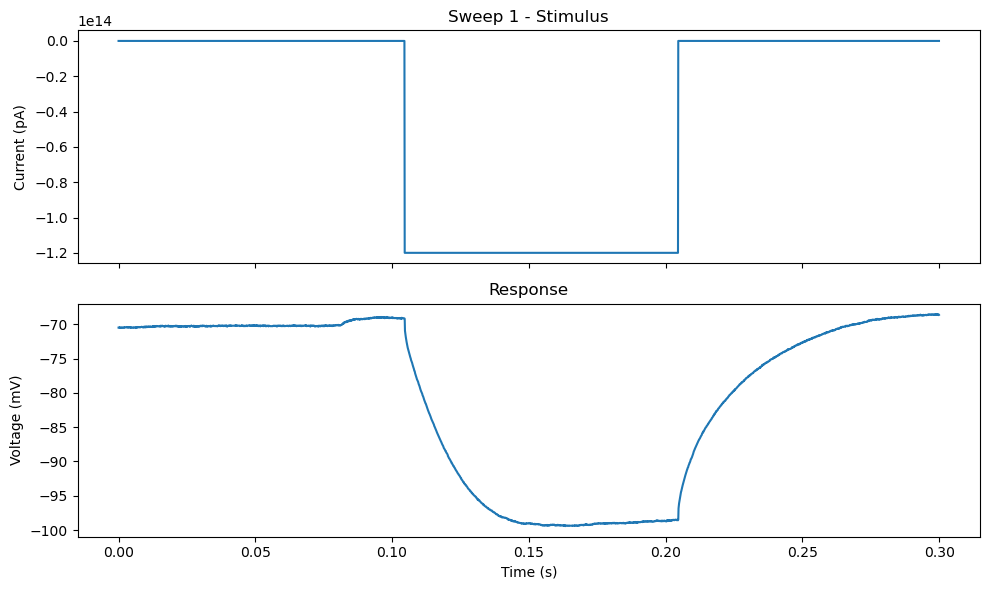

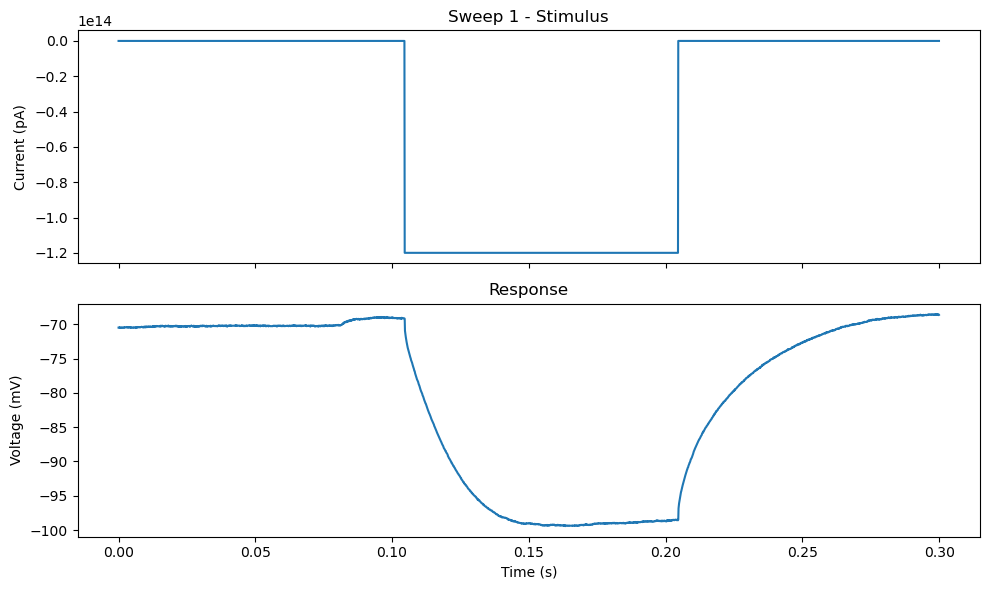

In [5]:
# Plot example sweep
stim = nwb.stimulus['stimulus-01-ch-0']
response = nwb.acquisition['current_clamp-response-01-ch-0']

plot_stim_response(stim, response, sweep_num=1)

## Analyzing Response Properties Across Sweeps

In [6]:
def extract_steady_state_response(response_series, stim_start_idx=1000, stim_duration_idx=500):
    """
    Extract steady-state response during stimulus period.
    
    Args:
        response_series: Response time series
        stim_start_idx: Index where stimulus starts
        stim_duration_idx: Duration of stimulus in samples
    
    Returns:
        float: Mean steady-state response
    """
    steady_state = np.array(response_series.data[stim_start_idx:stim_start_idx+stim_duration_idx])
    return np.mean(steady_state) * response_series.conversion * 1000  # Convert to mV

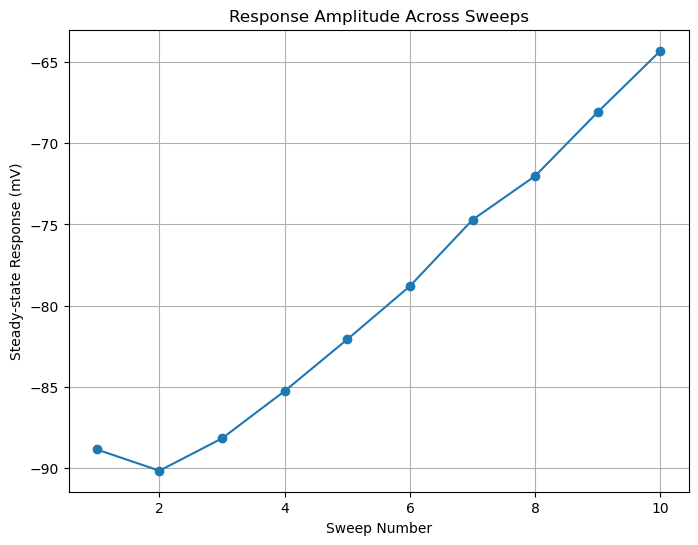

In [7]:
# Analyze first 10 sweeps
n_sweeps = 10
steady_state_responses = []

for i in range(1, n_sweeps+1):
    response = nwb.acquisition[f'current_clamp-response-{i:02d}-ch-0']
    steady_state = extract_steady_state_response(response)
    steady_state_responses.append(steady_state)

# Plot steady-state responses
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_sweeps+1), steady_state_responses, 'o-')
plt.xlabel('Sweep Number')
plt.ylabel('Steady-state Response (mV)')
plt.title('Response Amplitude Across Sweeps')
plt.grid(True)
plt.show()

## Next Steps
This notebook demonstrated basic access and visualization of intracellular recordings from the Dandiset. Possible next analyses could include:
- Characterizing membrane properties
- Analyzing spike dynamics
- Comparing responses across different cells and experimental conditions
- Investigating relationships between stimulus parameters and cellular responses